In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

100%|██████████| 964M/964M [00:09<00:00, 109MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/moltean/fruits/versions/11


Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2203/2203 ━━━━━━━━━━━━━━━━━━━━ 1174s 532ms/step - accuracy: 0.3871 - loss: 2.4977 - val_accuracy: 0.9114 - val_loss: 0.3141
Epoch 2/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 1217s 530ms/step - accuracy: 0.7753 - loss: 0.6553 - val_accuracy: 0.9605 - val_loss: 0.1862
Epoch 3/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 1221s 554ms/step - accuracy: 0.8324 - loss: 0.4816 - val_accuracy: 0.9571 - val_loss: 0.1805
Epoch 4/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 1180s 535ms/step - accuracy: 0.8658 - loss: 0.3841 - val_accuracy: 0.9575 - val_loss: 0.2138
Epoch 5/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 1179s 535ms/step - accuracy: 0.8917 - loss: 0.3126 - val_accuracy: 0.9637 - val_loss: 0.1827
Epoch 6/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 1177s 534ms/step - accuracy: 0.9034 - loss: 0.2779 - val_accuracy: 0.9618 - val_loss: 0.2086
Epoch 7/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 1186s 538ms/step - accuracy: 0.9156 - loss: 0.2409 - val_accuracy: 0.9685 - val_loss: 0.1749
Epoch 8/10
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 1173s 533ms/step - accur

Test Accuracy: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


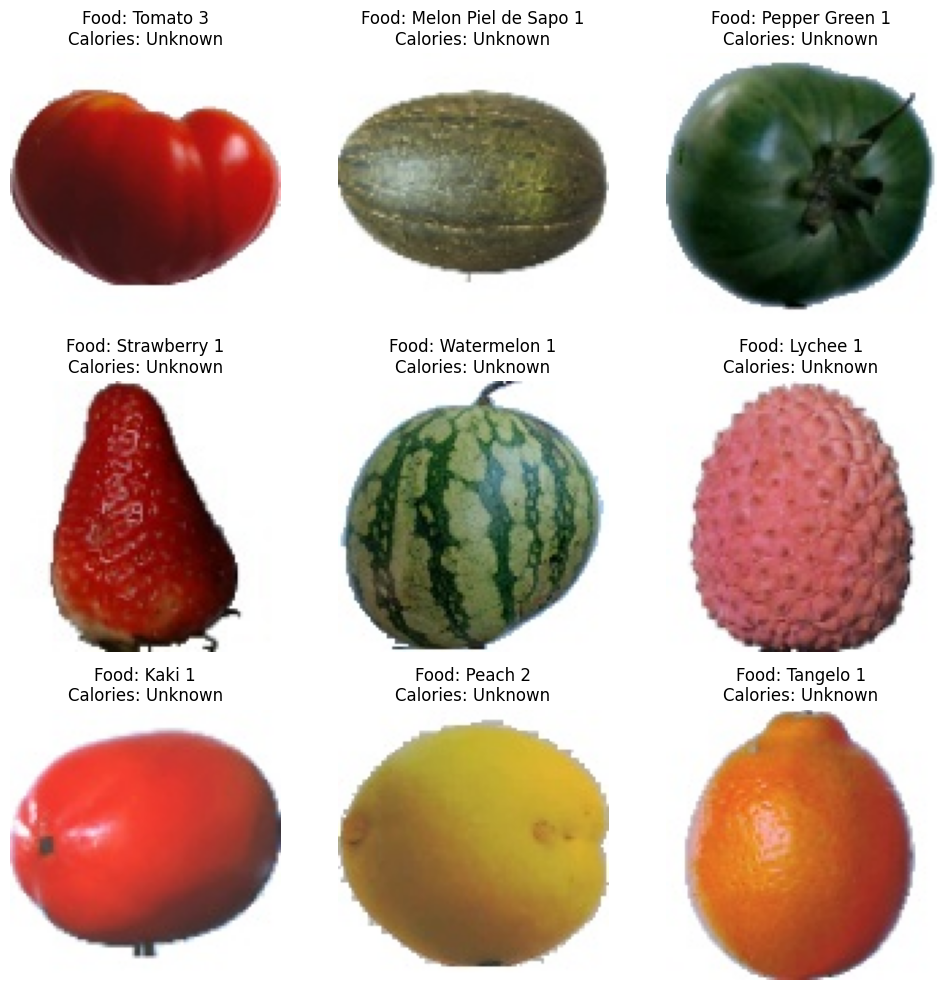

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define paths to dataset
DATASET_DIR = "/root/.cache/kagglehub/datasets/moltean/fruits/versions/11/fruits-360_dataset_100x100/fruits-360"
TRAIN_DIR = os.path.join(DATASET_DIR, "Training")
TEST_DIR = os.path.join(DATASET_DIR, "Test")

# Image dimensions
IMG_HEIGHT = 100
IMG_WIDTH = 100
BATCH_SIZE = 32

# Preprocessing the data
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Mapping of food classes to calorie content (example)
calorie_map = {
    'Apple': 52, 'Banana': 89, 'Blueberry': 57, 'Carrot': 41, 'Orange': 47,
    # Add more mappings for other classes as needed
}

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

# Evaluate the model
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.2f}")

# Save the model
model.save("food_recognition_model.h5")

# Calorie Estimation Function
def estimate_calories(predictions, class_indices):
    predicted_classes = [list(class_indices.keys())[np.argmax(pred)] for pred in predictions]
    estimated_calories = [calorie_map.get(cls, "Unknown") for cls in predicted_classes]
    return predicted_classes, estimated_calories

# Predictions and calorie estimation
test_images, test_labels = next(test_data)
predictions = model.predict(test_images)
predicted_classes, estimated_calories = estimate_calories(predictions, train_data.class_indices)

# Visualize predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Food: {predicted_classes[i]}\nCalories: {estimated_calories[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
